### Visualization Demos for Midterm Presentation

In [3]:
import os
import geopandas as gpd
import fiona
import matplotlib.pyplot as plt

In [4]:
# Specify path

parent_dir = os.path.dirname(os.getcwd()) #should be the EarthquakeDamageModel_Heinz
event_dir = os.path.join(parent_dir, 'ShakeMaps', 'nc72282711')
GPKG_PATH = os.path.join(event_dir, "eqmodel_outputs.gpkg")

#### Plotting Shakemap

In [5]:
pga_shakemap_path = os.path.join(event_dir, "pga.shp")

pga_shakemap = gpd.read_file(pga_shakemap_path)
pga_shakemap.head()

,AREA,PERIMETER,PGAPOL_,PGAPOL_ID,GRID_CODE,PARAMVALUE,geometry
0,0.0,0.0,0,0,0,0.01,"MULTIPOLYGON (((-122.16989 39.01667, -122.1744..."
1,0.0,0.0,1,1,0,0.02,"MULTIPOLYGON (((-122.61416 38.65833, -122.6158..."
2,0.0,0.0,2,2,0,0.04,"MULTIPOLYGON (((-122.42353 38.60833, -122.4247..."
3,0.0,0.0,3,3,0,0.06,"MULTIPOLYGON (((-122.09771 38.30833, -122.0987..."
4,0.0,0.0,4,4,0,0.08,"MULTIPOLYGON (((-122.24167 37.96624, -122.2422..."


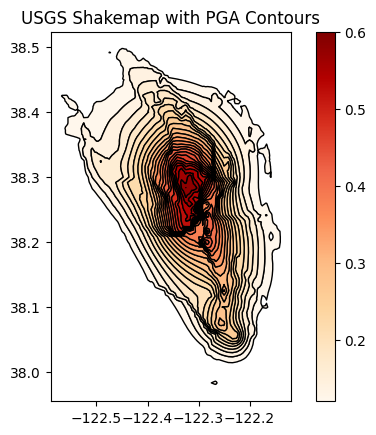

In [6]:
# Plot shakemap with PGA values
# Filtering to areas with PGA higher than 0.1
# remove / add edgecolor argument if you don't have the polygon borders
pga_shakemap[pga_shakemap["PARAMVALUE"] > 0.1].plot(column="PARAMVALUE", cmap="OrRd", legend=True, edgecolor="black")
plt.title("USGS Shakemap with PGA Contours")
plt.show()


In [7]:
# Read in the results of o2_census_intersect.py
# List all layers in the GPKG
layers = fiona.listlayers(GPKG_PATH)
layers


['init',
 'shakemap_tractclip_mmi',
 'shakemap_tractclip_pgv',
 'shakemap_tractclip_pga',
 'tract_shakemap_mmi',
 'tract_shakemap_pgv',
 'tract_shakemap_pga']

In [8]:
# Pull in final PGA layer
tract_shakemap_pga = gpd.read_file(GPKG_PATH, layer='tract_shakemap_pga')

tract_shakemap_pga

,GEOID,max_intensity,min_intensity,mean_intensity,geometry
0,06001400100,0.02,0.02,0.02,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466..."
1,06001400200,0.02,0.02,0.02,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577..."
2,06001400300,0.02,0.02,0.02,"MULTIPOLYGON (((-122.26563 37.83764, -122.2655..."
3,06001400400,0.02,0.02,0.02,"MULTIPOLYGON (((-122.26183 37.84162, -122.2618..."
4,06001400500,0.02,0.02,0.02,"MULTIPOLYGON (((-122.26951 37.84858, -122.2693..."
...,...,...,...,...,...
2600,06115040800,0.01,0.01,0.01,"MULTIPOLYGON (((-121.51552 39.03064, -121.5153..."
2601,06115040901,0.01,0.01,0.01,"MULTIPOLYGON (((-121.58338 39.1362, -121.58319..."
2602,06115040902,0.01,0.01,0.01,"MULTIPOLYGON (((-121.47722 39.13333, -121.4770..."
2603,06115041000,0.01,0.01,0.01,"MULTIPOLYGON (((-121.63637 39.24608, -121.6362..."


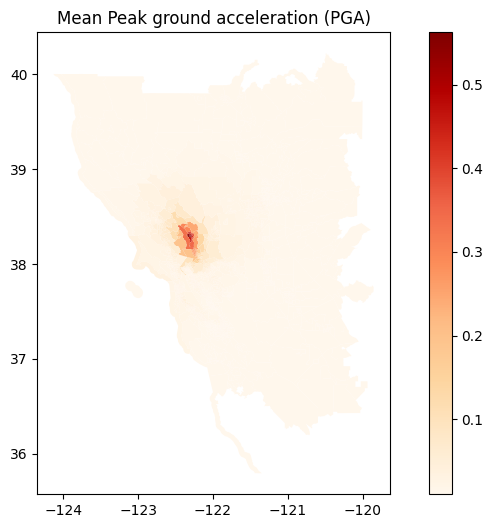

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))
tract_shakemap_pga.plot(column="mean_intensity", cmap="OrRd", legend=True, ax = ax)
ax.set_title("Mean Peak ground acceleration (PGA)")
plt.show()

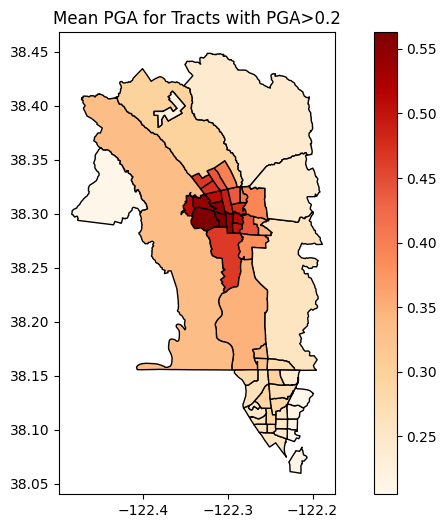

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))
tract_shakemap_pga[tract_shakemap_pga['mean_intensity'] > 0.2].plot(column="mean_intensity", cmap="OrRd", edgecolor="black", legend=True, ax = ax)
ax.set_title("Mean PGA for Tracts with PGA>0.2")
plt.show()

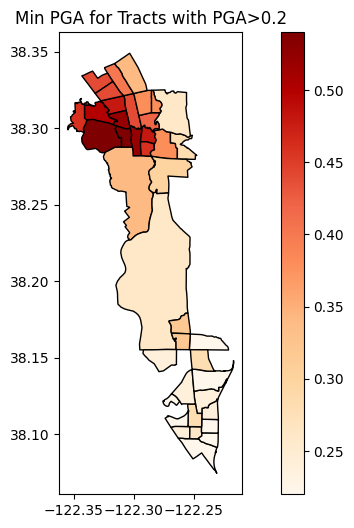

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))
tract_shakemap_pga[tract_shakemap_pga['min_intensity'] > 0.2].plot(column="min_intensity", cmap="OrRd", edgecolor="black", legend=True, ax = ax)
ax.set_title("Min PGA for Tracts with PGA>0.2")
plt.show()